In [1]:
import matplotlib
matplotlib.use('Agg')
from tools import *
#%matplotlib notebook
import pandas as pd

In [2]:
data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev.csv')
data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev_crowding.csv')
data = data.iloc[(data['PDC'].values > 0)]

data['kMeanPSFMag'] = -2.5*np.log10(data['PDC'].values)
data['kMeanPSFMagErr'] = 0.01#(-2.5 / np.log(10)) * (data['PDCe'].values / data['PDC'].values) #0.05#np.abs(data['PDCe'].values) / np.abs(data['PDC'].values)/10
#data = data.iloc[abs(data['kMeanPSFMagErr'].values) < 0.1] 
diff = abs(data['rMeanPSFMag'].values - data['crMeanPSFMag'].values)
ind = diff < 1

data = data.iloc[ind]

ind = ((abs(data['zMeanPSFMagErr'].values) < 0.5) & 
       (abs(data['gMeanPSFMagErr'].values) < 0.5) & 
       (abs(data['rMeanPSFMagErr'].values) < 0.5) & 
       (abs(data['iMeanPSFMagErr'].values) < 0.5))
data = data.iloc[ind]



In [4]:
model = np.load('caspec_MS_mags.npy',allow_pickle=True).item()
camp = 8


zps_z = np.zeros(85)
zps_k = np.zeros(85)
exs = np.zeros(85)
for i in range(85):
    cind =  ((data['campaign'].values == camp) & (data['Channel'].values == i+1))
    try:
        ex, dat = Tonry_reduce(data.iloc[cind])
        exs[i] = ex
        ex = 0 
        compare_z = np.array([['g-r','g-z'],['g-r','r-z'],['g-r','i-z'],['g-r','g-i']])
        compare_k = np.array([['g-r','g-k'],['g-r','r-k'],['g-r','k-i']])#,['g-r','k-z']])
        dd = dat.iloc[dat['Channel'].values==i+1]
        if len(dat) > 10:
            zp_z, d_z = Fit_zeropoint(dd,model,compare_z,ex,'z')
            zp_k, d_k = Fit_zeropoint(dd,model,compare_k,ex,'k')
            zps_z[i] = zp_z
            zps_k[i] = zp_k
            
            c_z = Make_colours(d_z,model,compare_z,Extinction = ex)
            c_k = Make_colours(d_k,model,compare_k,Extinction = ex)
            Plotter(zp_z,c_z,compare_z,i+1,camp,'z','./figs/crowd/',Close=True)
            Plotter(zp_z,c_z,compare_z,i+1,camp,'z','./figs/crowd/',Residuals=True,Close=True)

            Plotter(zp_k,c_k,compare_k,i+1,camp,'k','./figs/crowd/',Close=True)
            Plotter(zp_k,c_k,compare_k,i+1,camp,'k','./figs/crowd/',Residuals=True,Close=True)
        else:
            print('bad C{}, chan{}'.format(j,i))
    except:
        pass

In [5]:
exs

array([0.01453933, 0.02071189, 0.01876626, 0.00755976, 0.        ,
       0.        , 0.        , 0.        , 0.03898881, 0.03751258,
       0.0257281 , 0.02044652, 0.01847904, 0.00829748, 0.01670722,
       0.02339881, 0.        , 0.        , 0.        , 0.        ,
       0.02668523, 0.02936518, 0.02098684, 0.02903732, 0.03103045,
       0.03766792, 0.03324957, 0.0141797 , 0.03164349, 0.03810773,
       0.02015865, 0.03202865, 0.00902314, 0.02104385, 0.01845136,
       0.00642233, 0.01577801, 0.01864471, 0.00992447, 0.02121777,
       0.02747751, 0.0191041 , 0.02783514, 0.01422746, 0.03351695,
       0.02364557, 0.05100057, 0.04044654, 0.02629485, 0.03966485,
       0.03678781, 0.02534732, 0.00293594, 0.01214866, 0.01926487,
       0.01737039, 0.01923064, 0.00401996, 0.01518386, 0.01670602,
       0.00321425, 0.01089893, 0.00537975, 0.01864038, 0.03221506,
       0.02751412, 0.01583814, 0.02655364, 0.0298229 , 0.02831614,
       0.03669163, 0.04040768, 0.01985619, 0.02512927, 0.02149

In [8]:
zps_k

array([25.33616834, 25.36567462, 25.29153165, 25.27833937,  0.        ,
        0.        ,  0.        ,  0.        , 25.35071157, 25.277267  ,
       25.24726113, 25.27158268, 25.28849614, 25.25697768, 25.24562322,
       25.26956813,  0.        ,  0.        ,  0.        ,  0.        ,
       25.43871677, 25.40815942, 25.39303043, 25.40143357, 25.38993379,
       25.40541049, 25.38767031, 25.36507609, 25.34746571, 25.34431881,
       25.30302636, 25.27882655, 25.28118811, 25.30841611, 25.23357251,
       25.26417885, 25.39216763, 25.39331314, 25.37465654, 25.375585  ,
       25.35709958, 25.36312488, 25.38005668, 25.33416196, 25.36706552,
       25.36946958, 25.35204727, 25.31859425, 25.32925545, 25.33251473,
       25.22602913, 25.23627658, 25.32941543, 25.3367208 , 25.34053757,
       25.29013576, 25.38620445, 25.40207742, 25.37775712, 25.34429613,
       25.34802196, 25.35705611, 25.35811933, 25.35849926, 25.38582208,
       25.42339465, 25.3664497 , 25.34526134, 25.36724133, 25.34

In [4]:
plt.figure()
plt.hist(zps_k)

(array([ 8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.]),
 array([ 0.        ,  2.54387168,  5.08774335,  7.63161503, 10.17548671,
        12.71935838, 15.26323006, 17.80710174, 20.35097342, 22.89484509,
        25.43871677]),
 <a list of 10 Patch objects>)

In [17]:
np.save('output/crowding_zps_c16.npy',zps_k)

In [26]:
camp

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [32]:
data['campaign'].unique()

array([11, 15,  3, 17, 12, 14,  1,  5,  4, 16, 18, 13])

In [10]:
model = np.load('caspec_MS_mags.npy',allow_pickle=True).item()


camp = np.arange(0,20)
zps_z = np.zeros((20,84))
zps_k = np.zeros((20,84))
exs = np.zeros((20,84))
for j in range(len(camp)):
    print('camp ',camp[j])
    for i in range(85):
        cind =  ((data['campaign'].values == j) & (data['Channel'].values == i+1))
        if len(data.iloc[cind]) > 10:
            ex, dat = Tonry_reduce(data.iloc[cind])
            #ex = 0
            exs[j,i] = ex
            compare_z = np.array([['g-r','g-z'],['g-r','r-z'],['g-r','i-z'],['g-r','g-i']])
            compare_k = np.array([['g-r','g-k'],['g-r','r-k'],['g-r','k-i']])#,['g-r','k-z']])
            dd = dat
            test = Make_colours(dd,model,compare_k,Extinction = ex)
            good = (test['obs g-r'] >= 0.2) & (test['obs g-r'] <= 0.8)
            if sum(good[0]) >= 10:
                zp_z, d_z = Fit_zeropoint(dd,model,compare_z,ex,'z')
                zp_k, d_k = Fit_zeropoint(dd,model,compare_k,ex,'k')
                zps_z[j,i] = zp_z
                zps_k[j,i] = zp_k

                c_z = Make_colours(d_z,model,compare_z,Extinction = ex)
                c_k = Make_colours(d_k,model,compare_k,Extinction = ex)
                Plotter(zp_z,c_z,compare_z,i+1,j,'z','./figs/crowd/',Close=True)
                Plotter(zp_z,c_z,compare_z,i+1,j,'z','./figs/crowd/',Residuals=True,Close=True)

                Plotter(zp_k,c_k,compare_k,i+1,j,'k','./figs/crowd/',Close=True)
                Plotter(zp_k,c_k,compare_k,i+1,j,'k','./figs/crowd/',Residuals=True,Close=True)
            else:
                print('bad C{}, chan{}'.format(j,i))


camp  0
0
bad C0, chan0
0
bad C0, chan1
1
bad C0, chan8
0
bad C0, chan9
1
bad C0, chan10
8
bad C0, chan12
27
14
6
bad C0, chan15
4
bad C0, chan20
2
bad C0, chan21
0
bad C0, chan22
5
bad C0, chan23
3
bad C0, chan24
4
bad C0, chan25
4
bad C0, chan26
3
bad C0, chan27
7
bad C0, chan28
3
bad C0, chan29
0
bad C0, chan30
2
bad C0, chan31
47
3
bad C0, chan33
3
bad C0, chan34
34
1
bad C0, chan36
3
bad C0, chan37
1
bad C0, chan38
6
bad C0, chan39
3
bad C0, chan40
2
bad C0, chan41
2
bad C0, chan42
0
bad C0, chan43
2
bad C0, chan44
4
bad C0, chan45
7
bad C0, chan46
1
bad C0, chan47
2
bad C0, chan48
2
bad C0, chan49
6
bad C0, chan50
1
bad C0, chan51
49
2
bad C0, chan53
2
bad C0, chan54
38
1
bad C0, chan56
5
bad C0, chan57
2
bad C0, chan58
3
bad C0, chan59
1
bad C0, chan60
3
bad C0, chan61
5
bad C0, chan62
34
93
5
bad C0, chan65
7
bad C0, chan66
65
1
bad C0, chan68
2
bad C0, chan69
9
bad C0, chan70
3
bad C0, chan71
10
16
9
bad C0, chan74
7
bad C0, chan75
4
bad C0, chan76
7
bad C0, chan77
7
bad C0, c

37
33
55
32
39
40
38
36
35
32
18
31
25
40
26
34
27
34
31
47
32
33
29
32
24
20
64
35
32
31
27
36
39
40
43
34
57
31
29
40
49
19
22
30
20
24
51
53
23
16
11
21
21
38
44
49
54
31
29
42
33
28
52
51
55
camp  19


In [8]:
np.save('output/zeropoint_kep.npy',zps_k)

In [9]:
np.save('output/zeropoint_z.npy',zps_z)

In [14]:
test = np.load('')

array([[ 0.        ,  0.        ,  0.        , ..., 25.4226841 ,
        25.47433395, 25.37683521],
       [25.34632076, 25.3844163 , 25.3095489 , ..., 25.34817281,
        25.34465386, 25.32483592],
       [ 0.        , 25.42361216, 25.20434016, ..., 25.35023923,
        25.33935826, 25.46296337],
       ...,
       [25.20175379, 25.4844302 , 24.21861287, ..., 25.3271987 ,
        25.31839468, 25.29512539],
       [25.27067305, 25.30330396, 25.17417149, ..., 25.29278159,
        25.27171975, 25.24863289],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

<IPython.core.display.Javascript object>


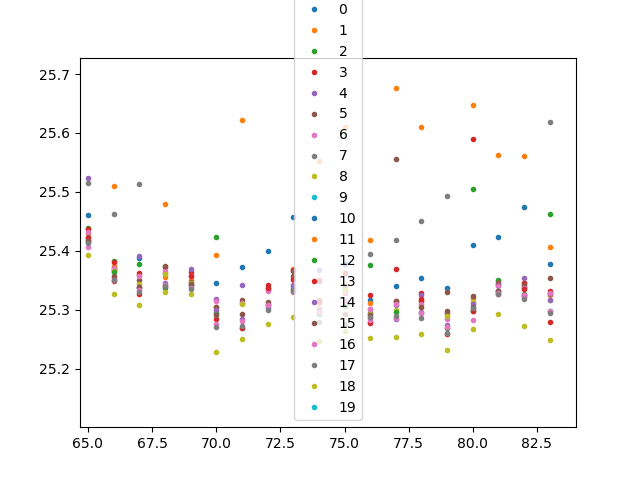

In [7]:
z = zps_k.copy()
z[z==0] = np.nan
plt.figure()
for i in range(len(camp)):
    plt.plot(z[i],'.',label=str(i))
plt.legend()

In [5]:
zp_k, d_k = Fit_zeropoint(dd,model,compare_k,ex,'k')

In [6]:
zp_k

array([26.69053113])

In [16]:
ex, dd = Tonry_reduce(data.iloc[cind])
k = 0
res = minimize(SLR_residual_multi,k,args=(dd,model,compare_k,ex,'k'))

In [17]:
res.x

array([25.36449982])

In [18]:
test = Make_colours(dd,model,compare_k,Extinction = ex)

<IPython.core.display.Javascript object>


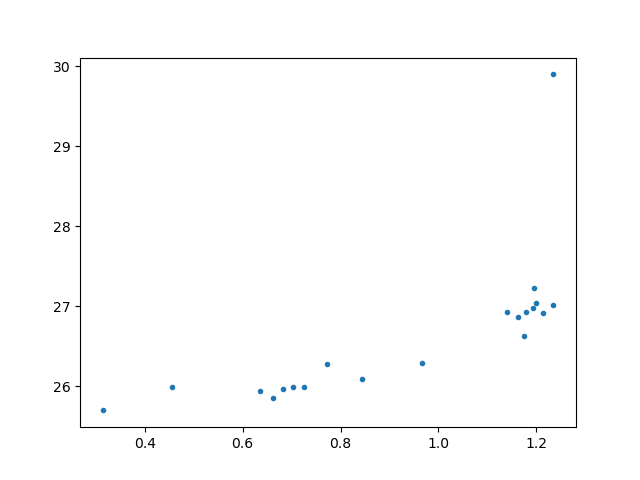

In [20]:
plt.figure()
plt.plot(test['obs g-r'][0],test['obs g-k'][0],'.')

<IPython.core.display.Javascript object>


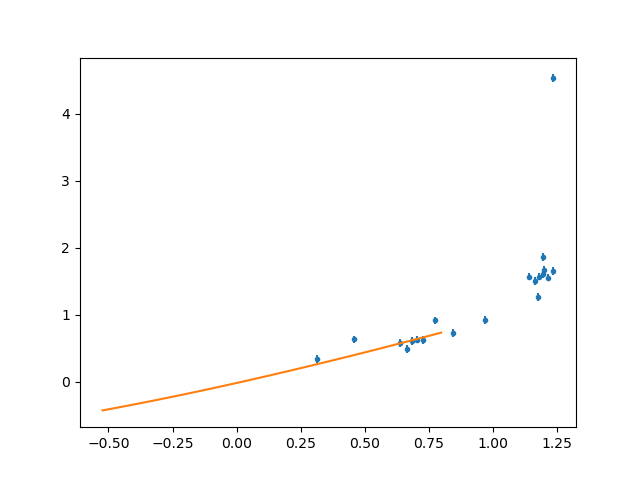

<IPython.core.display.Javascript object>


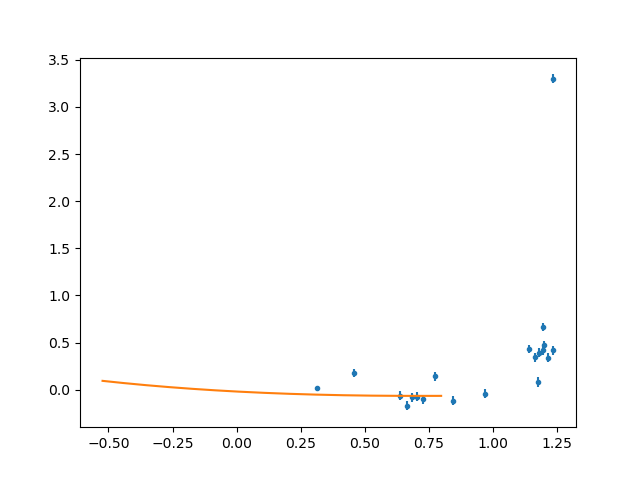

<IPython.core.display.Javascript object>


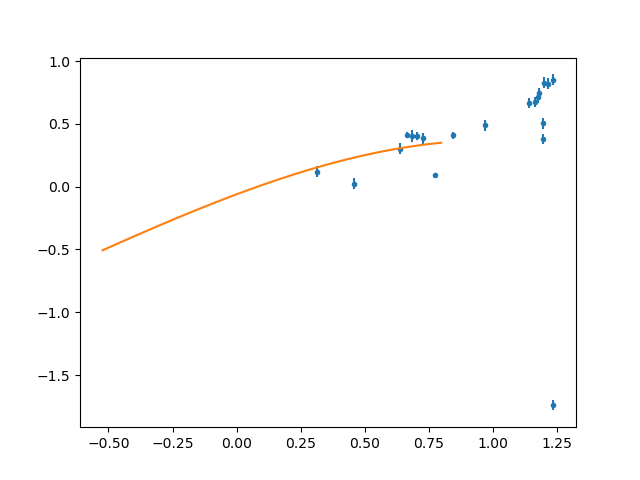

In [21]:
bads = Cut_data(res.x,dd,model,compare_k,ex,Band='k',Plot=True)

In [ ]:
bads

In [22]:
inds = np.ones(len(dd))
for b in bads:
    inds[b] = 0
d = dd.iloc[inds > 0]

In [23]:
zp_k, d_k = Fit_zeropoint(d,model,compare_k,ex,'k')

In [24]:
model = np.load('caspec_MS_mags.npy',allow_pickle=True).item()
c_k = Make_colours(d,model,compare_k,Extinction = ex)

In [25]:
zp_k

array([25.36449982])

<IPython.core.display.Javascript object>


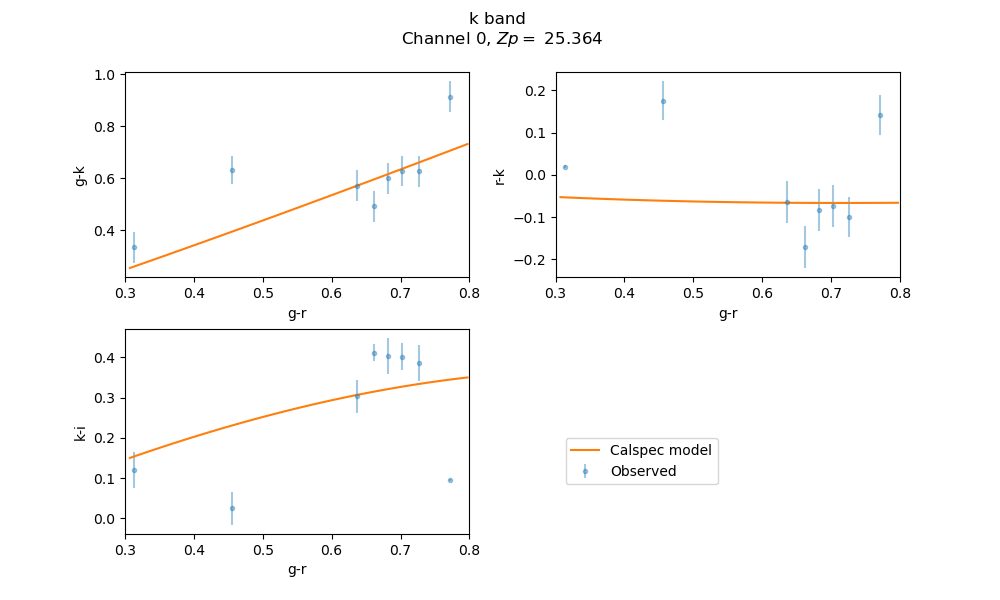

In [27]:
Plotter(zp_k,c_k,compare_k,0,0,'k','./figs/',Close=False,Residuals=False)

In [ ]:
i = 30
print(crap.iloc[i].RAJ2000, crap.iloc[i].DecJ2000)

In [ ]:
plt.figure

In [ ]:
model

In [ ]:
crap.iloc[34].ID

In [ ]:
import lightkurve as lk

In [ ]:
tpf = lk.search_targetpixelfile('EPIC251503536',campaign=17).download()

In [ ]:
tpf.interact()